# MSc. Project

## Title: Creating an Integrated Green Product Database

### Type: Exploratory Software

#### By: Anushree Sarvey Sathish (sc22a2ss@leeds.ac.uk)

### Problem Statement
- Growing global concern about the impact of products on the planet.
- Consumers want to make informed choices about the products they purchase and are seeking green/sustainable products.
- **Lack of reliable and readily available green product data** along with its sustainability credentials.

### Benefits of Green Product Database:
- Consumers can make informed decisions about the products they purchase.
- Businesses can develop and market green products.
- Governments can track the progress of green initiatives.
- Researchers can study the impact of green products on the environment.
- Educators can teach students about green products.


### Project Aim
Create **Green Product Database** which contains _product data_ like title, description, price, brand, etc and _sustainability information_ on various categories like environment, health, quality and social.

### Objectives
- Identify product data with descriptions that can help in identifying the sustainability information of the product.
- Identify source of sustainability information. 
- Identify suitable techniques to map each product with their sustainability labels. 
- Build a pipeline to use the product data, sustainability information and map the two to create the Green products dataset. 
- Demonstrate the usage of the database through case studies.

### Solution

- [X] Identify product data with descriptions - **Amazon Product Data**
- [X] Identify source of sustainability information - **ASSET Ontology Data**
- [X] Keyword Extraction - Identify relavant tags from product descriptions - TF-IDF
- [X] Mapping Keywords - Map idenitified keywords with sustainability factors - Ontology-based computation
- [ ] Evaluation - Case Studies (Comparitive Analysis, Evaluation of Classification Model)


## Deliverables
 - Green Product Database (Sqlite3)
 - Data Pipeline Modules
 - Two Sample Data Pipelines (for 2 different data sources)

### Project Pipeline
<center><img src="ProjectDataPipeline.drawio.png" width="100%"/></center>


### Green Product Database Schema

<center><img src="DBSchema1.svg" width="50%"/></center>

### Ontology Data
#### Product Tags
Product tags are keywords extracted from product's descriptions

Example:<br>
__Product Title__ - *uncle bens whole grain brown rice bag lb* <br>
__Product Description__ - *discover a delicious way to support a healthy heart and a wellbalanced diet this flavorful  whole grain brown rice is __low in fat__ high in flavor and a natural source of fiber use our whole grain brown rice in your favorite rice dishes from rice pilaf and jambalaya to stirfry rice recipesand everything inbetween uncle bens whole grain brown rice is __gluten free__ sodium free and __cholesterol free__ and contains zero grams of trans fat and no saturated fat so it is a choice you can feel good about when you start your meal with uncle bens rice its easy to cook a tasty wholesome meal that everyone will enjoy diets __low in saturated fats__ and cholesterol may reduce the risk of heart disease whole grain brown parboiled rice*

__Product Tags__ - *low fat*, *gluten free*, *cholesterol free*, *low saturated fats*


### Sustainbility Preferences
These are sustaibility goals under different dimensions - environment, health, quality, social

Example:

- *Products without preservatives* - Health category
- *Products disposed in an environmentally friendly way (e.g. bio-degradable or recyclable packaging)* - Environment category
- *Fresh products* - Quality category
- *Products from companies that support animal rights protection* - Social category


### Associations

Relation between product and preference tags. This relation can be positive or negative.

Example:

- Preference tag "*vegan*" - __positive association__ -> product tag "*plant based product*"

- Preference tag "*vegan*" - __negative association__ -> product tag "*contains egg*"

### Amazon Data

Dataset Link - https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/ 

|Dataset Feature|Value|
|---|---|
|Products Category|Grocery_and_Gourmet_Food|
|Number of columns|18|
|Number of records|287,051| 

### Import Required Modules

In [1]:
import pandas as pd
import numpy as np
import json
import re
import html
import import_ipynb


## Amazon Data

### Reading Amazon Data

In [2]:
AMAZON_DATA_FILE_PATH = "..\..\AmazonReviewMetadata\\meta_Grocery_and_Gourmet_Food.json"
data = []
with open(AMAZON_DATA_FILE_PATH) as f:
    for line in f:
        data.append(json.loads(line.strip()))
amazon_data = pd.DataFrame.from_dict(data)
print(f"Number of columns: {amazon_data.shape[1]} | Number of records= {amazon_data.shape[0]}")
print(f"Columns in amazon dataset: {list(amazon_data.columns)}")

Number of columns: 19 | Number of records= 287051
Columns in amazon dataset: ['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details']


### Data Overview

In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         287051 non-null  object
 1   tech1            287051 non-null  object
 2   description      287051 non-null  object
 3   fit              287051 non-null  object
 4   title            287051 non-null  object
 5   also_buy         287051 non-null  object
 6   tech2            287051 non-null  object
 7   brand            287051 non-null  object
 8   feature          287051 non-null  object
 9   rank             287051 non-null  object
 10  also_view        287051 non-null  object
 11  main_cat         287051 non-null  object
 12  similar_item     287051 non-null  object
 13  date             287051 non-null  object
 14  price            287051 non-null  object
 15  asin             287051 non-null  object
 16  imageURL         287051 non-null  object
 17  imageURLHi

In [4]:
length = amazon_data["description"].apply(lambda z: len(str(z).split()))
print(max(length), min(length))

1487 1


In [5]:
length = amazon_data["description"].apply(lambda z: len(str(z).split()))
print(max(length), min(length))

1487 1


In [6]:
amazon_data.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [7]:
amazon_data["main_cat"].value_counts().reset_index().head(5)

,index,main_cat
0,Grocery,261845
1,Amazon Home,8953
2,Health & Personal Care,8543
3,Toys & Games,1934
4,All Beauty,1604


In [8]:
# Investigating primitive type of data
print(f"{'Column Name':<20} | {'Pandas Data Type':<20} | {'Primitive Type':<20}")
print("-"*60)
amazon_data.attrs = {}
amazon_data.attrs["dtype"] = {}
for col in amazon_data.columns:
    primitive_types = set([type(i) for i in amazon_data[col]])
    print(f"{col:<20} | {str(amazon_data[col].dtype):<20} | {str([t.__name__ for t in primitive_types]):<20}")
    amazon_data.attrs["dtype"][col] = primitive_types

Column Name          | Pandas Data Type     | Primitive Type      
------------------------------------------------------------
category             | object               | ['list']            
tech1                | object               | ['str']             
description          | object               | ['list']            
fit                  | object               | ['str']             
title                | object               | ['str']             
also_buy             | object               | ['list']            
tech2                | object               | ['str']             
brand                | object               | ['str']             
feature              | object               | ['list']            
rank                 | object               | ['str', 'list']     
also_view            | object               | ['list']            
main_cat             | object               | ['str']             
similar_item         | object               | ['str']             
d

In [9]:
# Setting empty lists and string NaN
for col in amazon_data.columns:
    if len(amazon_data.attrs["dtype"][col])>1:
        continue
    if list in amazon_data.attrs["dtype"][col]:
        amazon_data[col] = amazon_data[col].apply(lambda x: np.nan if len(x)==0 else x)
    elif str in amazon_data.attrs["dtype"][col]:
        amazon_data[col] = amazon_data[col].apply(lambda x: np.nan if len(x.strip())==0 else x)

In [10]:
amazon_data.isna().sum()

category                0
tech1              286307
description         35384
fit                287047
title                   3
also_buy           203757
tech2              287051
brand               11419
feature            270671
rank                    0
also_view          166113
main_cat             1363
similar_item       286795
date               277389
price              153193
asin                    0
imageURL           136901
imageURLHighRes    136901
details                24
dtype: int64

In [11]:
amazon_data["brand"].value_counts().head(5)

Unknown                  1780
Black Tie Mercantile     1458
Trader Joe's             1234
McCormick                1041
The Nutty Fruit House     998
Name: brand, dtype: int64

In [12]:
amazon_data["category"].value_counts().head(5)

[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Tea, Tea Samplers]                                        7609
[Grocery & Gourmet Food, Candy & Chocolate, Candy & Chocolate Bars]                                                7512
[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Coffee, Single-Serve Capsules & Pods]                     6745
[Grocery & Gourmet Food, Beverages, Coffee, Tea & Cocoa, Coffee, Ground Coffee]                                    5326
[Grocery & Gourmet Food, Cooking & Baking, Frosting, Icing & Decorations, Cake & Cupcake Toppers, Cake Toppers]    4821
Name: category, dtype: int64

In [13]:
for col in ["title", "description"]:
    special_chars = amazon_data[col].apply(lambda x: set(re.findall(r'&\w+', str(x))) if x else set()).aggregate({'Whitespace Characters': lambda x: set.union(*x)})[0]
    print(f"Sample of HTML encoded characters in column: '{col}'")
    print(f"{'HTML Encoded Char':>20} | {'Decoded Char':>20}")
    print("-"*50)
    for ch in list(special_chars)[:5]:
        print(f"{ch.lower(): >20} | {html.unescape(ch.lower()): >20}")
    print(f"{'TOTAL': >20} | {len(special_chars): >20}")    

Sample of HTML encoded characters in column: 'title'
   HTML Encoded Char |         Decoded Char
--------------------------------------------------
               &ouml |                    ö
             &ccedil |                    ç
               &sup1 |                    ¹
                &amp |                    &
               &cent |                    ¢
               TOTAL |                  103
Sample of HTML encoded characters in column: 'description'
   HTML Encoded Char |         Decoded Char
--------------------------------------------------
               &pink |                &pink
               &body |                &body
                  &f |                   &f
 &storewindowbgcolor |  &storewindowbgcolor
              &olive |               &olive
               TOTAL |                  302


In [14]:
col="description"
special_chars = amazon_data[col].apply(lambda x: set(re.findall(r'<\w*>', str(x))) if x else set()).aggregate({'Whitespace Characters': lambda x: set.union(*x)})[0]
print(f"HTML tags in column: '{col}': {special_chars}")

HTML tags in column: 'description': {'<span>', '<P>', '<small>', '<U>', '<tbody>', '<H2>', '<DIV>', '<Strong>', '<colgroup>', '<STRONG>', '<html>', '<em>', '<b>', '<BR>', '<TR>', '<TD>', '<body>', '<sup>', '<sub>', '<center>', '<div>', '<>', '<Br>', '<h1>', '<h5>', '<lu>', '<th>', '<i>', '<ul>', '<UL>', '<h3>', '<title>', '<style>', '<big>', '<H5>', '<strong>', '<td>', '<Kafemio>', '<milk>', '<li>', '<Li>', '<H4>', '<head>', '<EM>', '<I>', '<table>', '<EOL>', '<tr>', '<ol>', '<xml>', '<blockquote>', '<bR>', '<LI>', '<h4>', '<br>', '<h2>', '<u>', '<B>'}


In [15]:
category_count = amazon_data["category"].apply(lambda categories: len(categories))
category_count.name = "category_count"
category_count.value_counts()

4     126693
3      79167
5      67752
2      10992
6       2395
8         19
9         15
7          8
10         7
11         2
13         1
Name: category_count, dtype: int64

### Pre-Processing (Amazon Data)

In [16]:
from ProjectModules import ColumnDropper, RowDropper, StringCleaner
from sklearn.pipeline import Pipeline

importing Jupyter notebook from ProjectModules.ipynb


**Filter the data** to include only **Food Category**.

In [17]:
amazon_data = amazon_data.loc[amazon_data["main_cat"]=="Grocery"].reset_index(drop=True)
amazon_data["description"] = amazon_data["description"].apply(
    lambda desc: ' '.join(desc) if type(desc)==list else desc)
amazon_data["description_before"] = amazon_data["description"].apply(
    lambda desc: ' '.join(desc) if type(desc)==list else desc)

**Defining Pre-Processing Pipeline**

In [18]:
amazon_data_preprocess_pipeline = Pipeline([
    ("drop_columns", ColumnDropper(columns=['category', 'description', 'description_before', 'title', 'brand', 'price', 'asin'], 
                                   should_drop=False)),
    ("drop_rows", RowDropper(columns=["title", "description"])),
    ("clean_string", StringCleaner(columns=["description"])),
    ("final_drop_rows", RowDropper(columns=["description"]))
])
# amazon_data = amazon_data_preprocess_pipeline.fit_transform(amazon_data)
# amazon_data.to_csv("cleaned_amazon_data.csv")
amazon_data = pd.read_csv("cleaned_amazon_data.csv")
amazon_data.drop(amazon_data.columns[0], axis=1, inplace=True)
print(f"Number of columns: {amazon_data.shape[1]} | Number of records= {amazon_data.shape[0]}")
print(f"Columns in amazon dataset: {list(amazon_data.columns)}")
amazon_data.head(2)

Number of columns: 7 | Number of records= 202961
Columns in amazon dataset: ['category', 'description', 'title', 'brand', 'price', 'asin', 'description_before']


,category,description,title,brand,price,asin,description_before
0,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eg...",beemster gouda cheese aged months statements r...,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,Ariola Imports,$41.91,0681727810,BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS Statem...
1,"['Grocery & Gourmet Food', 'Cooking & Baking',...",shipped from uk please allow to business days ...,Trim Healthy Mama Xylitol,NaN,NaN,0853347867,"Shipped from UK, please allow 10 to 21 busines..."


In [19]:
# As this category is mostly required for data visualisation later, this field will not be cleaned any further
amazon_data["category"].value_counts().head(5)

['Grocery & Gourmet Food', 'Candy & Chocolate', 'Candy & Chocolate Bars']                                   5651
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Tea Samplers']                       5124
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee', 'Single-Serve Capsules & Pods']    4571
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee', 'Ground Coffee']                   3603
['Grocery & Gourmet Food', 'Candy & Chocolate', 'Hard Candy & Lollipops', 'Hard Candy']                     3348
Name: category, dtype: int64

In [20]:
from ProjectModules import DatabaseWriter

In [21]:
dbWriter = DatabaseWriter("green_product_db_final.db")
dbWriter.create_tables()

Successfully created tables


In [22]:
table_col_map = {"asin":"product_code", "title": "product_title", "description_before":"product_description", "category":"product_category"}
data_to_insert = amazon_data[['asin', 'title', 'description_before', 'category', 'brand', 'price']]
data_to_insert["source"] = "amazon_data_1"
data_to_insert = data_to_insert.rename(columns=table_col_map)
dbWriter.insert_data(df=data_to_insert, table_name="product_data", include_index=True)

Successfully inserted (or updated) product_data table


## Ontology Data

### Reading Ontology Data

In [23]:
ONTOLOGY_DATA_PATH = "I:\MSc\Product Dataset\\"
product_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "product_tags.csv")
preferences = pd.read_csv(ONTOLOGY_DATA_PATH + "preferences.csv")
field_test_preferences = pd.read_csv(ONTOLOGY_DATA_PATH + "field_test_preferences.csv")
preference_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "preference_tags.csv")
preference_to_tags = pd.read_csv(ONTOLOGY_DATA_PATH + "preference_to_tags.csv")
associations = pd.read_csv(ONTOLOGY_DATA_PATH + "associations.csv")

In [24]:
summary = pd.DataFrame()
summary["Total No. of Records"] = [product_tags.shape[0], 
                    preferences.shape[0], 
                    field_test_preferences.shape[0], 
                    preference_tags.shape[0], 
                    preference_to_tags.shape[0],
                    associations.shape[0]]

In [25]:
# Filtering data present in the latest version (i.e, not removed from any version)
product_tags = product_tags[product_tags["version removed"]==-1]
preferences = preferences[preferences["version removed"]==-1]
preference_tags = preference_tags[preference_tags["version removed"]==-1]
preference_to_tags = preference_to_tags[preference_to_tags["version removed"]==-1]
associations = associations[associations["version removed"]==-1]

# Dropping 'version removed' column
product_tags.drop("version removed", axis=1, inplace=True)
preferences.drop("version removed", axis=1, inplace=True)
preference_tags.drop("version removed", axis=1, inplace=True)
preference_to_tags.drop("version removed", axis=1, inplace=True)
associations.drop("version removed", axis=1, inplace=True)

field_test_preferences = field_test_preferences.iloc[:,:-3] 

In [26]:

summary["No. of Records (Latest)"] = [product_tags.shape[0], 
                    preferences.shape[0], 
                    field_test_preferences.shape[0], 
                    preference_tags.shape[0], 
                    preference_to_tags.shape[0],
                    associations.shape[0]]
summary["No. of Columns"] = [product_tags.shape[1], 
                    preferences.shape[1], 
                    field_test_preferences.shape[1], 
                    preference_tags.shape[1], 
                    preference_to_tags.shape[1],
                    associations.shape[1]]
summary["Column Names"] = [product_tags.columns.values, 
                    preferences.columns.values, 
                    field_test_preferences.columns.values, 
                    preference_tags.columns.values, 
                    preference_to_tags.columns.values,
                    associations.columns.values]
summary.index = ["product_tags", 
                    "preferences", 
                    "field_test_preferences", 
                    "preference_tags", 
                    "preference_to_tags",
                    "associations"]

#### Summary

In [27]:
summary

,Total No. of Records,No. of Records (Latest),No. of Columns,Column Names
product_tags,290,196,2,"[product tag id, product tag]"
preferences,99,25,2,"[preference id, preference]"
field_test_preferences,25,25,5,"[preference category, preference id, preferenc..."
preference_tags,103,61,2,"[preference tag id, preference tag]"
preference_to_tags,217,148,2,"[preference id, preference tag id]"
associations,1203,795,3,"[preference tag id, product tag id, score]"


### Integrate Ontology Data

In [28]:
integrated_data = associations.merge(preference_tags, 
                   on="preference tag id", 
                   how="inner").merge(product_tags, 
                                      on="product tag id", 
                                      how="inner").merge(preference_to_tags, 
                                                         on="preference tag id", 
                                                         how="inner")
integrated_data = field_test_preferences.merge(integrated_data, on="preference id", how="left")

In [29]:
integrated_data.groupby(by=["preference category"]).size()

preference category
E. Environment    353
H. Health         115
Q. Quality         12
S. Social         404
dtype: int64

In [30]:
integrated_data[[ "product tag", "preference tag", "score",  "preference", "preference category"]].sample(5)

,product tag,preference tag,score,preference,preference category
629,organization/label tag 52,Animal Welfare,0.71,3. Products from companies that support animal...,S. Social
636,organization/label tag 54,Animal Welfare,0.87,3. Products from companies that support animal...,S. Social
65,organization/label tag 39,sustainable farming,0.50,1. Products disposed in an environmentally fri...,E. Environment
78,organization/label tag 96,green farming,0.10,1. Products disposed in an environmentally fri...,E. Environment
857,organization/label tag 20,Stakeholder participation,0.25,5. Products from companies with transparent ac...,S. Social


In [31]:
integrated_data.shape

(884, 10)

In [32]:
ontology_data = integrated_data.loc[~((integrated_data['product tag'].str.contains("organization")) 
                                      | (integrated_data['product tag'].str.contains("packaging")))].reset_index(drop=True)
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
318,very transparent company,fair trade,0.300,6. Products from fair trade label companies,S. Social,False
121,cholesterol free,allergen free,0.400,1. Allergen-free products,H. Health,False
151,egg origin - Estonia,gluten free,0.991,2. Gluten-free products,H. Health,True
179,medium sugars,low sugar,0.200,7. Low sugar products,H. Health,False
175,low salt,low salt,0.991,6. Low salt products,H. Health,False


In [33]:
ontology_data = ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]]
ontology_data.shape

(321, 6)

In [34]:
ontology_data[ontology_data["preference tag"]=="low water footprint"]

,product tag,preference tag,score,preference,preference category,is strict
69,egg origin - Estonia,low water footprint,0.1,2. Products produced and distributed in an env...,E. Environment,False
70,fresh made in store,low water footprint,0.1,2. Products produced and distributed in an env...,E. Environment,False
71,certified environmental impact,low water footprint,0.5,2. Products produced and distributed in an env...,E. Environment,False
72,company has an environmental report,low water footprint,0.2,2. Products produced and distributed in an env...,E. Environment,False
73,no public environmental reports,low water footprint,-0.2,2. Products produced and distributed in an env...,E. Environment,False
74,reduces water use,low water footprint,0.5,2. Products produced and distributed in an env...,E. Environment,False


In [35]:
sc = StringCleaner(["product tag", "preference tag"])
ontology_data = sc.transform(ontology_data)

In [36]:
integrated_data.groupby(by=["preference category", "preference"]).size().reset_index()["preference category"].value_counts()

H. Health         13
S. Social          6
E. Environment     3
Q. Quality         3
Name: preference category, dtype: int64

In [37]:
ontology_data.groupby(by=["preference category", "preference"]).size().reset_index()["preference category"].value_counts()

H. Health         13
S. Social          5
E. Environment     3
Q. Quality         3
Name: preference category, dtype: int64

In [38]:
integrated_data[~integrated_data["preference"].isin(ontology_data["preference"].unique())]["preference"].unique()[0]

'1. Products evaluated with auditing processes that rely on sustainability criteria.'

In [39]:
ontology_data.head(5)

,product tag,preference tag,score,preference,preference category,is strict
0,egg organic,biodegradeable,0.991,1. Products disposed in an environmentally fri...,E. Environment,False
1,egg free range,biodegradeable,0.991,1. Products disposed in an environmentally fri...,E. Environment,False
2,egg barn,biodegradeable,0.991,1. Products disposed in an environmentally fri...,E. Environment,False
3,egg enriched cages,biodegradeable,0.991,1. Products disposed in an environmentally fri...,E. Environment,False
4,egg origin estonia,biodegradeable,0.991,1. Products disposed in an environmentally fri...,E. Environment,False


### Analysing Word Counts

<AxesSubplot:xlabel='Word Count per Tag', ylabel='Number of Product Tags'>

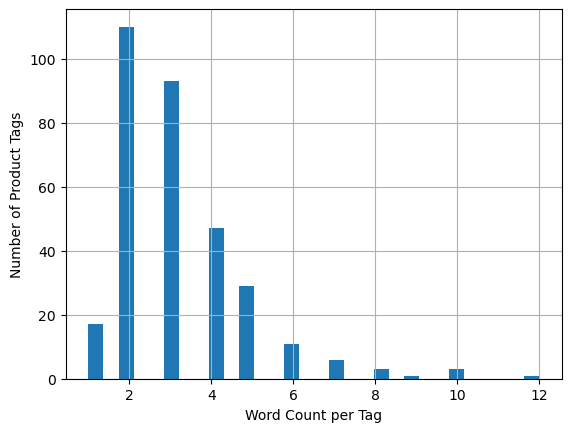

In [40]:
# Product Tags
word_count = ontology_data["product tag"].apply(lambda s: len(s.strip().split()))
ax = word_count.hist(bins=30)
ax.set_xlabel("Word Count per Tag")
ax.set_ylabel("Number of Product Tags")
ax

<AxesSubplot:xlabel='Word Count per Tag', ylabel='Number of Preference Tags'>

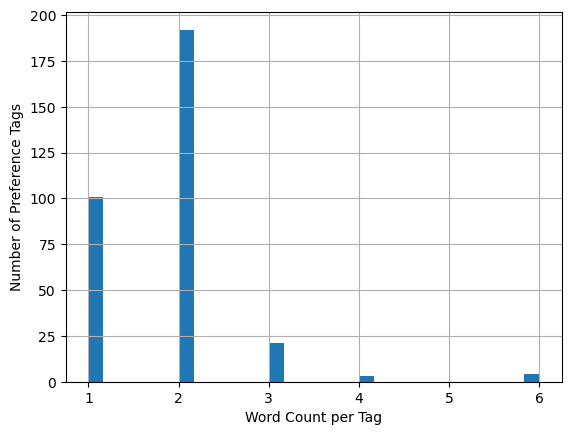

In [41]:
# Preference Tags
word_count = ontology_data["preference tag"].apply(lambda s: len(s.strip().split()))
ax = word_count.hist(bins=30)
ax.set_xlabel("Word Count per Tag")
ax.set_ylabel("Number of Preference Tags")
ax

## Vocab Creation

In [42]:
ontology_data["preference"] = ontology_data["preference"].apply(lambda s: ' '.join(s.split()[1:]))
ontology_data["preference category"] = ontology_data["preference category"].apply(lambda s: ' '.join(s.split()[1:]))
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
267,egg enriched cages,vegan,-1.000,Products from companies that support animal ri...,Social,False
289,very transparent company,fair trade,0.300,Products from companies that support animal ri...,Social,False
103,egg enriched cages,green farming,-0.951,Sustainably farmed products,Environment,False
298,fresh made in store,worker rights,0.300,Products from companies that support fairness ...,Social,False
187,fresh made in store,without preservatives,0.500,Products without preservatives,Health,False


In [43]:
ontology_data["score"] = ontology_data["score"].apply(lambda x: 1 if x>=0 else -1)


In [44]:
ontology_data[[ "product tag", "preference tag", "score",  "preference", "preference category", "is strict"]].sample(5)

,product tag,preference tag,score,preference,preference category,is strict
83,some close production plants,close production,1,Products produced and distributed in an enviro...,Environment,False
172,medium saturated fats,low fat,-1,Low fat products,Health,False
54,baumwollsack,waste recycling,1,Products disposed in an environmentally friend...,Environment,False
187,fresh made in store,without preservatives,1,Products without preservatives,Health,False
148,egg enriched cages,gluten free,1,Gluten-free products,Health,True


In [45]:
product_associations = ontology_data.groupby(by=["product tag", "preference", "preference category", "is strict"])['score'].agg([('sum','mean')]).reset_index()
product_associations["association"] = product_associations["sum"].apply(lambda x: 1 if x>=0 else -1)
product_associations = product_associations[["product tag", "preference", "association", "preference category", "is strict"]]
product_associations["tag_type"] = "product"
product_associations.columns = ["tag", "preference", "association", "preference category", "is strict", "tag_type"]
product_associations.head(5)

,tag,preference,association,preference category,is strict,tag_type
0,allergen nuts,Allergen-free products,-1,Health,False,product
1,allergen nuts,High-protein products,1,Health,False,product
2,allergen soybeans and products thereof,Allergen-free products,-1,Health,False,product
3,allergen soybeans and products thereof,High-protein products,1,Health,False,product
4,allergens celery and products thereof,Allergen-free products,-1,Health,False,product


In [46]:
preference_associations = ontology_data.groupby(by=["preference tag", "preference", "preference category", "is strict"]).count().reset_index()
preference_associations["association"] = 1
preference_associations = preference_associations[["preference tag", "preference", "association", "preference category", "is strict"]]
preference_associations["tag_type"] = "preference"
preference_associations.columns = ["tag", "preference", "association", "preference category", "is strict", "tag_type"]
preference_associations.head(5)

,tag,preference,association,preference category,is strict,tag_type
0,allergen free,Allergen-free products,1,Health,False,preference
1,animal rights,Products from companies that support animal ri...,1,Social,False,preference
2,antioxidants,Products rich in antioxidants,1,Health,False,preference
3,biodegradeable,Products disposed in an environmentally friend...,1,Environment,False,preference
4,biodynamic and permaculture,Products disposed in an environmentally friend...,1,Environment,False,preference


In [47]:
vocab = pd.concat([product_associations, preference_associations], ignore_index=True)
vocab = vocab.sort_values(by=["preference", "preference category"])
vocab.sample(5)

,tag,preference,association,preference category,is strict,tag_type
157,low salt,Low salt products,1,Health,False,product
182,no public environmental reports,Products from companies that support animal ri...,-1,Social,False,product
243,country of the retailer,Locally originated and domestic products,1,Quality,False,preference
228,very transparent company,Products from fair trade label companies,1,Social,False,product
258,low fat,Low fat products,1,Health,False,preference


<AxesSubplot:xlabel='Word Count per Tag', ylabel='Number of Tags'>

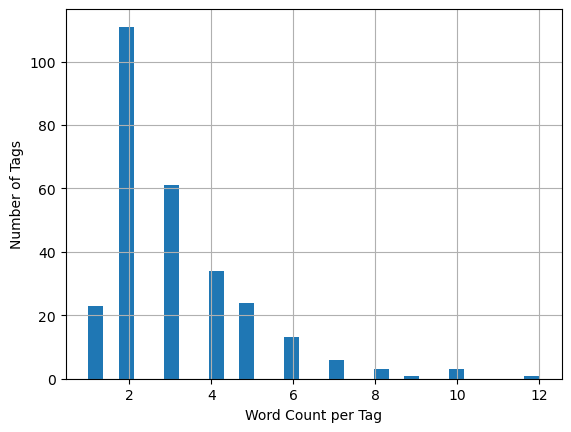

In [48]:
# Product Tags
word_count = vocab["tag"].apply(lambda s: len(s.strip().split()))
ax = word_count.hist(bins=30)
ax.set_xlabel("Word Count per Tag")
ax.set_ylabel("Number of Tags")
ax

### Automatic Data Augmentation

Combing preference and product tags to create vocabulary

In [49]:
vocab.groupby("preference")["tag"].agg([('Number of Tags', 'count')]).reset_index()

,preference,Number of Tags
0,Allergen-free products,31
1,Award winning or high quality certified products,2
2,Fresh products,3
3,Gluten-free products,10
4,High-protein products,11
5,Lactose-free products,5
6,Locally originated and domestic products,5
7,Low fat products,7
8,Low salt products,5
9,Low sugar products,4


In [50]:
vocab.groupby("preference category")["tag"].agg([('Number of Tags', 'count')]).reset_index()

,preference category,Number of Tags
0,Environment,75
1,Health,128
2,Quality,10
3,Social,67


In [51]:
# pd.DataFrame(vocab).to_excel("vocab.xlsx")

### Manual Data Augmentation

In [52]:
vocab_updated = pd.read_excel("vocab_updated.xlsx")
vocab_updated.drop(columns=vocab_updated.columns[0], axis=1, inplace=True)
vocab_updated.drop_duplicates(subset=["tag", "preference"], inplace=True)
vocab_updated.head(5)

,tag,preference,association,preference category,conditional,update_code,comment,Len
0,sustainable palm oil,Products produced and distributed in an enviro...,1,Environment,False,2,Removed Unnecessary Words,20
1,use some sustainable palm oil that doesnt caus...,Products produced and distributed in an enviro...,1,Environment,False,-1,Redundant,61
2,allergen milk of mammal and dairy product incl...,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,59
3,unsustainable palm oil,Products produced and distributed in an enviro...,-1,Environment,False,2,Removed Unnecessary Words,22
4,allergen mollusc such a snail clam cuttlefish ...,Allergen-free products,-1,Health,True,2,Removed Unnecessary Words,53


| Update Code | Code Description | Possible Reasons |
|---|---|---|
|0 | No Change | No changes done to the tag |
|1 | New tag added | Alternate tags for existing tags or negation of tags by using keywords like "without", "not" or "no" |
|2 | Updated | Spelling corrections or converting keyword from unigram to bi-gram |
|-1 | Removed | Specific to the experiment conducted in Estonian and Austrian market or non-English words or redundant tags |


In [53]:
vocab_updated["update_code"].value_counts()

 0    218
 1    125
 2     38
-1     23
Name: update_code, dtype: int64

In [54]:
vocab_updated.groupby(["preference", "preference category"])["tag"].agg([('count', 'count')]).reset_index().groupby("preference category")["preference"].count()

preference category
Environment     3
Health         14
Quality         3
Social          6
Name: preference, dtype: int64

In [55]:
vocab_updated = vocab_updated.loc[vocab_updated["update_code"]>=0]
vocab_updated.drop_duplicates(subset=["tag", "preference"], inplace=True)
vocab_updated.reset_index(drop=True, inplace=True)
vocab_updated.sample(5)

,tag,preference,association,preference category,conditional,update_code,comment,Len
339,green farm,Products from companies that support animal ri...,1,Social,False,0,No Change,10
130,fresh made in store,Fresh products,1,Quality,False,0,No Change,19
88,contain animal product,Vegetarian products,-1,Health,True,0,No Change,22
379,vegan,Vegan products,1,Health,True,0,No Change,5
256,no emulsifier,"Products without thickeners, stabilizers or em...",1,Health,False,1,Alternative,13


In [56]:
print(f"Vocab Size before Manual Data Augmentation = {vocab.shape[0]}")
print(f"Vocab Size after Manual Data Augmentation = {vocab_updated.shape[0]}")

Vocab Size before Manual Data Augmentation = 280
Vocab Size after Manual Data Augmentation = 381


In [57]:
table_col_map = {"preference":"sustainability_preference", "preference category": "preference_category"}
data_to_insert = vocab_updated[["tag", "preference", "preference category", "association", "conditional"]]
data_to_insert.index.name="idx"
# data_to_insert["conditional"] = data_to_insert["conditional"].astype(int)
data_to_insert = data_to_insert.rename(columns=table_col_map)
dbWriter.insert_data(df=data_to_insert, table_name="ontology_data", include_index=True)

Successfully inserted (or updated) ontology_data table


In [58]:
vocab_updated.groupby(["preference", "preference category"]).count().reset_index()[["preference", "preference category"]]

,preference,preference category
0,Allergen-free products,Health
1,Award winning or high quality certified products,Quality
2,Fresh products,Quality
3,Gluten-free products,Health
4,High-protein products,Health
5,Lactose-free products,Health
6,Locally originated and domestic products,Quality
7,Low fat products,Health
8,Low salt products,Health
9,Low sugar products,Health


## Keyword Extraction

In [59]:
from ProjectModules import KeywordExtractor, CustomTfidfVectorizer

In [60]:
with open("custom_stopwords.txt", "r") as f:
    custom_stopwords = f.read().split("\n")
print(f"Number of custom stopwords: {len(custom_stopwords)}")

Number of custom stopwords: 175


#### Checking TF-IDF without Augmented Vocab

In [61]:
print("TF-IDF without Vocab Augmentation")
tfidf_wva = CustomTfidfVectorizer(ngram_range=(2,3), stop_words=custom_stopwords)
keyword_extractor = KeywordExtractor(tfidf_wva)
keyword_extractor.create_vocab(vocab["tag"])
onto_tfidf_wva = keyword_extractor.get_vocab_tfidf()
desc_tfidf_wva = keyword_extractor.extract_keywords(amazon_data["description"])
print(f"Ontology vocab Size: {onto_tfidf_wva.shape[0]} | Number of features: {onto_tfidf_wva.shape[1]}")
print(f"Number of product descriptions: {desc_tfidf_wva.shape[0]}")
print(f"Product tags identified in {len(np.unique(desc_tfidf_wva.nonzero()[0]))} product descriptions out of {desc_tfidf_wva.shape[0]}")

TF-IDF without Vocab Augmentation
Ontology vocab Size: 280 | Number of features: 675
Number of product descriptions: 202961
Product tags identified in 53043 product descriptions out of 202961


#### Checking TF-IDF with Augmented Vocab

In [168]:
print("TF-IDF with Vocab Augmentation")
tfidf = CustomTfidfVectorizer(ngram_range=(2,3), stop_words=custom_stopwords, use_idf=False, norm=None)
keyword_extractor = KeywordExtractor(tfidf)
keyword_extractor.create_vocab(vocab_updated["tag"])
onto_tfidf = keyword_extractor.get_vocab_tfidf()
desc_tfidf = keyword_extractor.extract_keywords(amazon_data["description"])
print(f"Ontology vocab size: {onto_tfidf.shape[0]} | Number of features: {onto_tfidf.shape[1]}")
print(f"Number of product descriptions: {desc_tfidf.shape[0]}")
print(f"Product tags identified in {len(np.unique(desc_tfidf.nonzero()[0]))} product descriptions out of {desc_tfidf.shape[0]}")

TF-IDF with Vocab Augmentation
Ontology vocab size: 381 | Number of features: 611
Number of product descriptions: 202961
Product tags identified in 77084 product descriptions out of 202961


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from itertools import combinations
def custom_analyzer(s: str):
    words = s.split()
    n_grams = []
    words = [re.sub(r'(s|ing)$','',word) for word in words if (len(word)>1 and word not in custom_stopwords)]
    for i in range(len(words)):
        for j in range(2,4):
            n_grams+=[' '.join(n_gram) for n_gram in combinations(words[i:i+4], j)]
    return list(set(n_grams))

tf = TfidfVectorizer(analyzer=custom_analyzer, ngram_range=(2,3), vocabulary=tfidf.get_feature_names_out(),stop_words=custom_stopwords, use_idf=True)

In [181]:
ngrams = vocab_updated["tag"].apply(custom_analyzer)


381

In [298]:
tf = TfidfVectorizer(analyzer=custom_analyzer, ngram_range=(2,3), vocabulary=tfidf.get_feature_names_out(),stop_words=custom_stopwords, use_idf=False,binary=True)
o = tf.fit_transform(vocab_updated["tag"])
set(o.data), o

({0.1889822365046136,
  0.21320071635561041,
  0.25,
  0.2581988897471611,
  0.31622776601683794,
  0.5,
  1.0},
 <381x611 sparse matrix of type '<class 'numpy.float64'>'
 	with 1086 stored elements in Compressed Sparse Row format>)

In [208]:
o = o.tocsr()
o.nonzero(), o.getrow(363).data, tfidf.get_feature_names_out()[o.getrow(363).indices]

((array([  0,   0,   0, ..., 374, 375, 376]),
  array([398, 514, 515, ..., 344, 344, 344])),
 array([1.]),
 array(['palm oil'], dtype=object))

In [299]:
o = o.toarray()
for i in range(o.shape[1]):
    if (o[:,i]==1).sum()!=0:
        partial_mapping_indices = np.where(((o[:,i]<1) & (o[:,i]>0)))
        if len(partial_mapping_indices)!=0:
            o[partial_mapping_indices,i]=0
            print(i)

11
17
18
37
57
59
65
66
68
69
70
71
76
77
86
91
93
108
112
113
114
115
118
119
120
122
123
124
125
126
127
128
147
149
157
162
163
171
173
176
178
195
199
201
205
215
223
224
225
227
228
231
232
235
236
239
243
246
257
260
262
265
289
293
294
297
319
320
340
344
347
350
354
357
360
365
371
372
375
376
377
385
390
391
392
393
398
402
419
434
435
436
437
438
448
449
485
498
499
506
507
511
517
519
525
527
532
538
558
559
560
561
565
574
585
586
587
588
589
590
593
594
595
597
599
600
604
605
606
610


In [305]:
vocab_updated.iloc[~vocab_updated.index.isin(set(coo_matrix(o).row))]

,tag,preference,association,preference category,conditional,update_code,comment,Len
idx,,,,,,,,
221,biodegradeable,Products disposed in an environmentally friend...,1,Environment,False,0,No Change,14
241,other additive,Products without artificial colours or flavor ...,-1,Health,False,0,No Change,14
242,other additive,Products without preservatives,-1,Health,False,0,No Change,14
243,other additive,"Products without thickeners, stabilizers or em...",-1,Health,False,0,No Change,14
246,transportation,Products produced and distributed in an enviro...,1,Environment,False,0,No Change,14
299,transparency,Products from companies with transparent activ...,1,Social,False,0,No Change,12
311,antioxidant,Products rich in antioxidants,1,Health,False,0,No Change,11
346,vegetarian,Vegetarian products,1,Health,True,0,No Change,10
352,sweetener,Products without artificial colours or flavor ...,-1,Health,False,0,No Change,9


In [302]:
o.shape[0]

381

In [297]:
csr_matrix(o)

<381x611 sparse matrix of type '<class 'numpy.float64'>'
	with 1054 stored elements in Compressed Sparse Row format>

In [296]:
np.where(o[:,398]!=0), tfidf.get_feature_names_out()[398], o[:,398]

((array([363], dtype=int64),),
 'palm oil',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [265]:
np.where(tfidf.get_feature_names_out()=="palm oil")

(array([398], dtype=int64),)

In [272]:
vocab_updated.iloc[np.where(o[590]!=0)]

,tag,preference,association,preference category,conditional,update_code,comment,Len
idx,,,,,,,,
50,without artificial flavor,Products without artificial colours or flavor ...,1,Health,False,1,Negation,25
248,without flavor,Products without artificial colours or flavor ...,1,Health,False,1,Alternative,14


In [207]:
vocab_updated[vocab_updated["tag"]=="palm oil"]

,tag,preference,association,preference category,conditional,update_code,comment,Len
idx,,,,,,,,
363,palm oil,Products produced and distributed in an enviro...,-1,Environment,False,1,Alternative,8


In [183]:
ngrams = sorted(set(ngrams.agg("sum")))

In [283]:
type(ngrams)

list

In [185]:
len(ngrams), len(tf.get_feature_names_out()), len(tfidf.get_feature_names_out())

(611, 611, 611)

In [172]:
d = tf.fit_transform(amazon_data["description"])
d

<202961x611 sparse matrix of type '<class 'numpy.float64'>'
	with 189181 stored elements in Compressed Sparse Row format>

In [179]:
tf.get_feature_names_out(), tfidf.get_feature_names_out()

(array(['agent used', 'allergen celery', 'allergen celery product',
        'allergen clam', 'allergen crustacean',
        'allergen crustacean product', 'allergen dairy',
        'allergen derived', 'allergen derived product', 'allergen dioxide',
        'allergen dioxide sulfite', 'allergen egg', 'allergen egg poultry',
        'allergen egg product', 'allergen fish', 'allergen fish derived',
        'allergen fish product', 'allergen free', 'allergen gluten',
        'allergen lupin', 'allergen lupin product', 'allergen lupine',
        'allergen lupine product', 'allergen mammal',
        'allergen mammal dairy', 'allergen milk', 'allergen milk dairy',
        'allergen milk mammal', 'allergen mollusc',
        'allergen mollusc clam', 'allergen mollusc snail',
        'allergen mollusk', 'allergen mollusk product', 'allergen mustard',
        'allergen mustard derived', 'allergen mustard product',
        'allergen mustard seed', 'allergen nut', 'allergen nut product',
        'a

In [175]:
keyword_extractor.desc_tfidf=d
desc_tfidf=d

In [134]:
from scipy.sparse import csr_matrix
new_data = np.ones_like(onto_tfidf.data)
n = csr_matrix((new_data, onto_tfidf.indices, onto_tfidf.indptr), shape=onto_tfidf.shape)

In [138]:
desc_tfidf.data

array([1.        , 1.        , 1.        , ..., 0.64916921, 1.        ,
       1.        ])

In [139]:
keyword_extractor.vocab_tfidf = n

In [63]:
# import pickle
# keyword_extractor = pickle.load(open("keyword_extractor", "rb"))
# onto_tfidf = keyword_extractor.get_vocab_tfidf()
# desc_tfidf = keyword_extractor.desc_tfidf

In [140]:
vocabulary = pd.DataFrame()
vocabulary["vocab"] = keyword_extractor.tfidfVectorizer.get_feature_names_out()
dbWriter.insert_data(df=vocabulary, table_name="vocabulary", include_index=True)

Successfully inserted (or updated) vocabulary table


#### Investigating the difference

**Without Manual Augmentation**

In [65]:
wva_ex = np.setdiff1d(np.unique(desc_tfidf_wva.nonzero()[0]), np.unique(desc_tfidf.nonzero()[0]))
va_ex = np.setdiff1d(np.unique(desc_tfidf.nonzero()[0]), np.unique(desc_tfidf_wva.nonzero()[0]))

In [66]:
for i in wva_ex[:2]:
    print(f"Product Index: {i}")
    print(f"Description: {amazon_data.iloc[i]['description']}")
    print(f"Keywords identified: {tfidf_wva.get_feature_names_out()[desc_tfidf_wva[i].indices]}\n")

Product Index: 411
Description: the caricato family hand picks and cold presses its own olives in a traditional stone frantoio the family s organically farmed trees some over years old have been in the family since the result of the family s obsession with quality is a rich fragrant green gold oil with an intense flavor and excellent fruit character use this oil with soups pasta sauces and grilled meats statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['use oil']

Product Index: 1292
Description: chinrose champion stem ginger in syrup is chinese ginger preserved in a sugar and water syrup it has the consistency of a canned peach or pear yet it still maintains the ginger tang it can be eaten on its own or mixed with cream cheese used in sauces an ingredient in cooking the options are endless country of origin china ginger sugar water statements regarding

In [67]:
i = 1292
print(f"Product Index: {i}")
print(f"Description: {amazon_data.iloc[i]['description']}")
print(f"Keywords identified: {tfidf_wva.get_feature_names_out()[desc_tfidf_wva[i].indices]}\n")

Product Index: 1292
Description: chinrose champion stem ginger in syrup is chinese ginger preserved in a sugar and water syrup it has the consistency of a canned peach or pear yet it still maintains the ginger tang it can be eaten on its own or mixed with cream cheese used in sauces an ingredient in cooking the options are endless country of origin china ginger sugar water statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['country origin']



**With Manual Augmentation**

In [68]:
for i in va_ex[:2]:
    print(f"Product Index: {i}")
    print(f"Description: {amazon_data.iloc[i]['description']}")
    print(f"Keywords identified: {tfidf.get_feature_names_out()[desc_tfidf[i].indices]}\n")

Product Index: 3
Description: lipton yellow label teabags uses a new way to make tea to lock in as much of the tea taste and aroma as possible we developed an innovative new process we press fresh high quality tea leaves to release their natural essence and we have developed a new blend with this essence enjoy a cup of tea with perfect color and taste that reinvigorates you shipping weight keywords search terms black tea bags lipton tea bags statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['high quality']

Product Index: 25
Description: personality wise and lively a breath of fresh air herbal power gently shakes things up and helps you breathe easy reason to love one of our original formulas breathe easy tea has been supporting people for nearly four decades this enduring classic combines the best of western herbalism with ancient traditional chinese w

In [69]:
i = 3
print(f"Product Index: {i}")
print(f"Description: {amazon_data.iloc[i]['description']}")
print(f"Keywords identified: {tfidf.get_feature_names_out()[desc_tfidf[i].indices]}\n")

Product Index: 3
Description: lipton yellow label teabags uses a new way to make tea to lock in as much of the tea taste and aroma as possible we developed an innovative new process we press fresh high quality tea leaves to release their natural essence and we have developed a new blend with this essence enjoy a cup of tea with perfect color and taste that reinvigorates you shipping weight keywords search terms black tea bags lipton tea bags statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keywords identified: ['high quality']



#### Investigate descriptions and identified keywords

In [70]:
value_counts = np.unique(desc_tfidf.nonzero()[0], return_counts=True)
print("Top few descriptions with most keywords: ")
for i in sorted(zip(*value_counts), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Product Index: {i[0]:<10} Number of keywords: {i[1]:<10}")


Top few descriptions with most keywords: 
Product Index: 5524       Number of keywords: 37        
Product Index: 31891      Number of keywords: 36        
Product Index: 18832      Number of keywords: 35        
Product Index: 19096      Number of keywords: 35        
Product Index: 19102      Number of keywords: 35        
Product Index: 5523       Number of keywords: 34        
Product Index: 5542       Number of keywords: 34        
Product Index: 25287      Number of keywords: 34        
Product Index: 50191      Number of keywords: 34        
Product Index: 32944      Number of keywords: 33        


In [71]:
sample_index = 5524
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description'][:2000]}")
print(f"\nKeyword Identified: {keyword_extractor.tfidfVectorizer.get_feature_names_out()[desc_tfidf[sample_index].indices]}")

Sample Index: 5524
Product details for the considered sample: 
Title: EnviroKidz Organic Gluten-Free Animal Cookies, Vanilla, 9-Ounce Boxes (Pack of 12)
Description: whether you re big or little nature s path cookies will satisfy the kid in all of us kid pleasing bite sized fun don t let the kids fool you they re good for adults too treat yourself div class aplus img src https images na ssl images amazon com images g grocery detail page naturespath glutenfreeinsert jpg alt certified gluten free align left nature s path organic honey d corn flakes cereal b contains crisp golden gluten free flakes made of pure cornmeal lightly sweetened with concentrated grape juice and with a mix of organic evaporated cane juice and honey be sure you will not have to lower your expectations even if you are eating a gluten free wheat free breakfast you do not have to settle for ordinary flakes or tasteless gluten free cereal when nature s path offers so much more a pinch of this a dash of that but never 

In [72]:
sample_index = 50191      
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"\nKeyword Identified: {keyword_extractor.tfidfVectorizer.get_feature_names_out()[desc_tfidf[sample_index].indices]}")

Sample Index: 50191
Product details for the considered sample: 
Title: Nature's Path Crunchy Vanilla Sunrise, Gluten Free, 10.6 Ounces (Pack of 3)
Description: a delicious vanilla breakfast cereal with a variety of crunchy textures from flakes puffs and crispies make this a genuinely tasty gluten free breakfast div class aplus img src https images na ssl images amazon com images g grocery detail page naturespath glutenfreeinsert jpg alt certified gluten free align left nature s path organic sunrise crunchy vanilla cereal b is a delicious warm real vanilla breakfast cereal with a variety of crunchy textures from flakes puffs and crispies a genuinely tasty gluten free breakfast be sure you will not have to lower your expectations even if you are eating a gluten free wheat free breakfast it contains the whole grain goodness of organic flax buckwheat and the ancient grains quinoa and amaranth these were once the staples of aztec and peruvian homes and now you can enjoy their unique tastes 

#### Elimination of redundant bigrams

In [141]:
desc_tfidf = keyword_extractor.eliminate_redundant_bigram()

In [142]:
sample_index = 26
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"\nKeyword Identified: {keyword_extractor.tfidfVectorizer.get_feature_names_out()[desc_tfidf[sample_index].indices]}")

Sample Index: 26
Product details for the considered sample: 
Title: WHOPPERS Candy (Chocolate Covered Malted Milk Candy Balls),7 Ounce Bag (Pack of 12)
Description: whoppers malted milk balls are the classic confections that have delighted chocolate lovers for decades enjoy the classic combination of crunchy malt and smooth milk chocolate whoppers candies are the perfect snack for the office home or on the go you can even use them for edible crafts or baking great for filling candy bowls snacking with your favorite movie or tv show or simply enjoying as an afternoon treat whoppers malted milk balls are ou certified as a kosher food stock up for snacks and special events with this pack of individual ounce bags all major allergens are contained and listed as ingredients on our labels as recommended by food allergy and anaphylaxis network faan please check the label on each package before purchasing sugar corn syrup partially hydrogenated palm kernel oil whey milk malted milk barley malt 

In [75]:
keywords = desc_tfidf.tocsr().nonzero()
product_keywords = pd.DataFrame()
product_keywords["product_idx"]=keywords[0]
product_keywords["vocab_idx"]=keywords[1]
product_keywords["source"] = "amazon_data_1"

dbWriter.insert_data(df=product_keywords, table_name="product_keywords", include_index=False)

Successfully inserted (or updated) product_keywords table


In [76]:
keywords = []
for row in desc_tfidf:
    keywords.append(keyword_extractor.tfidfVectorizer.get_feature_names_out()[row.indices])
amazon_data["keywords"] = keywords

In [77]:
amazon_data.to_csv("amazon_data_with_keywords.csv")

## Mapping Keywords

In [78]:
from ProjectModules import KeywordsMapper

### Compute Mapping

In [146]:
keywords_mapper = KeywordsMapper(onto_tfidf= onto_tfidf, desc_tfidf=desc_tfidf)
importance = keywords_mapper.compute_mapping()
importance

<202961x381 sparse matrix of type '<class 'numpy.float64'>'
	with 333437 stored elements in Compressed Sparse Row format>

In [147]:
importance.data

array([1., 1., 1., ..., 1., 1., 1.])

In [143]:
importance.data

array([1., 1., 1., ..., 1., 1., 1.])

### Aggregate Scores
#### Product to Ontology Mapping

In [148]:
all_mappings = keywords_mapper.create_map_df()
all_mappings.head(5)

,product_idx,onto_idx,imp_score
0,3,47,1.0
1,11,38,1.0
2,18,0,1.0
3,18,2,1.0
4,18,259,1.0


In [149]:
data_to_insert = all_mappings[["product_idx", "onto_idx", "imp_score"]]
data_to_insert["source"] = "amazon_data_1"
dbWriter.insert_data(df=data_to_insert, table_name="product_ontology_mapping", include_index=False)

Successfully inserted (or updated) product_ontology_mapping table


In [150]:
dbWriter.execute_script(query_script="generate_product_sustainability_mapping_pivot_query.sql", should_generate_query=True)

Pivot table query generated: drop view if exists v_green_product_sustainability_mapping; create view v_green_product_sustainability_mapping as  select source, product_idx , avg(association_imp_score) filter (where preference_category = "Environment") as "environment" , avg(association_imp_score) filter (where preference_category = "Health") as "health" , avg(association_imp_score) filter (where preference_category = "Social") as "social" , avg(association_imp_score) filter (where preference_category = "Quality") as "quality" from (select pom.source, pom.product_idx, od.preference_category, 
pom.imp_score*od.association as association_imp_score 
from product_ontology_mapping pom 
left join ontology_data od 
on pom.onto_idx=od.idx where od.conditional=False) group by source, product_idx order by source, product_idx;
Script generate_product_sustainability_mapping_pivot_query.sql executed succesfully!


In [151]:
dbWriter.execute_script(query_script="generate_dietary_mapping_pivot_query.sql", should_generate_query=True)

Pivot table query generated: drop view if exists v_green_product_dietary_mapping; create view v_green_product_dietary_mapping as  select source, product_idx , avg(association_imp_score) filter (where sustainability_preference = "Allergen-free products") as "allergen-free" , avg(association_imp_score) filter (where sustainability_preference = "Gluten-free products") as "gluten-free" , avg(association_imp_score) filter (where sustainability_preference = "Vegan products") as "vegan" , avg(association_imp_score) filter (where sustainability_preference = "Vegetarian products") as "vegetarian" , avg(association_imp_score) filter (where sustainability_preference = "Lactose-free products") as "lactose-free" from (select pom.source, pom.product_idx, od.sustainability_preference, 
pom.imp_score*od.association as association_imp_score 
from product_ontology_mapping pom 
left join ontology_data od 
on pom.onto_idx=od.idx where od.conditional=True) group by source, product_idx order by source, prod

In [152]:
dbWriter.execute_script(query_script="final_green_product_info_queries.sql");

Script final_green_product_info_queries.sql executed succesfully!


In [153]:
all_mappings = keywords_mapper.integrate_ontology(vocab_updated[["tag", "preference", "preference category", "association", "conditional"]])
all_mappings.head(5)

,product_idx,onto_idx,imp_score,tag,preference,preference category,association,conditional,association_imp_score
0,3,47,1.0,high quality and standard,Award winning or high quality certified products,Quality,1,False,1.0
1,11,38,1.0,allergen sesame seed product,Allergen-free products,Health,-1,True,-1.0
2,18,0,1.0,sustainable palm oil,Products produced and distributed in an enviro...,Environment,1,False,1.0
3,18,2,1.0,unsustainable palm oil,Products produced and distributed in an enviro...,Environment,-1,False,-1.0
4,18,259,1.0,palm oil free,Products produced and distributed in an enviro...,Environment,1,False,1.0


In [86]:
all_mappings.to_csv("all_mappings.csv")

#### Sustainability Mapping

In [154]:
green_products = dbWriter.read_table("v_green_product_info")
green_products

Successfully loaded data from v_green_product_info!


,source,idx,product_description,keywords,health,social,environment,quality,vegan,gluten-free,vegetarian,lactose-free,allergen-free
0,amazon_data_1,3,Lipton Yellow Label Teabags uses a new way to ...,high quality,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,amazon_data_1,11,Gur Revdi is made by mixing Sesame seeds with ...,sesame seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,amazon_data_1,18,Natures Best Nigerian Palm Oil is a popular pa...,palm oil,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,amazon_data_1,25,"Personality: Wise and lively, a breath of fres...",quality standard,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,amazon_data_1,26,WHOPPERS Malted Milk Balls are the classic con...,"artificial flavor, natural flavor, palm oil",0.35,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167518,amazon_data_1,202956,"A unique blend of herbs, Just Goddess from Ham...",allergen product,1.00,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0
167519,amazon_data_1,202957,Caffarel fruit jellies are a product of Italy....,"gell agent, gluten free",0.00,NaN,NaN,NaN,NaN,0.76,NaN,NaN,NaN
167520,amazon_data_1,202957,Caffarel fruit jellies are a product of Italy....,"gell agent, gluten free",0.00,NaN,NaN,NaN,NaN,0.76,NaN,NaN,NaN
167521,amazon_data_1,202958,Hampton Creeks Just Mayo Truffle makes fancy f...,allergen product,1.00,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0


In [87]:
final_mapping = keywords_mapper.aggregate_mapping(by="preference category", conditional=False)
final_mapping.columns = ["Environment", "Health", "Quality", "Social"]
final_mapping.head(5)

,Environment,Health,Quality,Social
product_idx,,,,
3,NaN,NaN,1.0,NaN
18,0.0,NaN,NaN,NaN
25,NaN,NaN,1.0,NaN
26,0.0,0.346410,NaN,NaN
27,NaN,0.353553,NaN,-0.707107


In [155]:
final_mapping = keywords_mapper.aggregate_mapping(by="preference category", conditional=False)
final_mapping.columns = ["Environment", "Health", "Quality", "Social"]
final_mapping.head(5)

,Environment,Health,Quality,Social
product_idx,,,,
3,NaN,NaN,1.0,NaN
18,0.0,NaN,NaN,NaN
25,NaN,NaN,1.0,NaN
26,0.0,0.345399,NaN,NaN
27,NaN,0.353553,NaN,-0.707107


In [88]:
keywords_mapper.df

,product_idx,onto_idx,imp_score,tag,preference,preference category,association,conditional,association_imp_score
0,3,47,1.0,high quality and standard,Award winning or high quality certified products,Quality,1,False,1.0
1,11,38,1.0,allergen sesame seed product,Allergen-free products,Health,-1,True,-1.0
2,18,0,1.0,sustainable palm oil,Products produced and distributed in an enviro...,Environment,1,False,1.0
3,18,2,1.0,unsustainable palm oil,Products produced and distributed in an enviro...,Environment,-1,False,-1.0
4,18,259,1.0,palm oil free,Products produced and distributed in an enviro...,Environment,1,False,1.0
...,...,...,...,...,...,...,...,...,...
333432,202959,99,1.0,allergen fish product,Allergen-free products,Health,-1,True,-1.0
333433,202959,100,1.0,allergen fish product,High-protein products,Health,1,False,1.0
333434,202959,101,1.0,allergen fish product,Products from companies that support animal ri...,Social,-1,False,-1.0
333435,202959,102,1.0,allergen fish product,Vegan products,Health,-1,True,-1.0


In [89]:
final_mapping.to_csv("aggregated_mappings.csv")

In [90]:
final_mapping[final_mapping.count(axis=1)>1].head(5)

,Environment,Health,Quality,Social
product_idx,,,,
26,0.0,0.346410,NaN,NaN
27,NaN,0.353553,NaN,-0.707107
29,0.0,0.353553,NaN,NaN
33,NaN,0.277778,NaN,-0.500000
37,0.0,0.447214,NaN,-0.447214


## Examples

In [91]:
sample_index = 26
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"Keyword Identified: {tfidf.get_feature_names_out()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index])
vocab_updated.iloc[importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 26
Product details for the considered sample: 
Title: WHOPPERS Candy (Chocolate Covered Malted Milk Candy Balls),7 Ounce Bag (Pack of 12)
Description: whoppers malted milk balls are the classic confections that have delighted chocolate lovers for decades enjoy the classic combination of crunchy malt and smooth milk chocolate whoppers candies are the perfect snack for the office home or on the go you can even use them for edible crafts or baking great for filling candy bowls snacking with your favorite movie or tv show or simply enjoying as an afternoon treat whoppers malted milk balls are ou certified as a kosher food stock up for snacks and special events with this pack of individual ounce bags all major allergens are contained and listed as ingredients on our labels as recommended by food allergy and anaphylaxis network faan please check the label on each package before purchasing sugar corn syrup partially hydrogenated palm kernel oil whey milk malted milk barley malt 

,tag,preference,association
idx,,,
0,sustainable palm oil,Products produced and distributed in an enviro...,1
2,unsustainable palm oil,Products produced and distributed in an enviro...,-1
46,free of artificial flavor,Products without artificial colours or flavor ...,1
50,without artificial flavor,Products without artificial colours or flavor ...,1
123,no artificial flavor,Products without artificial colours or flavor ...,1
164,artificial flavor,Products without artificial colours or flavor ...,-1
240,natural flavor,Products without artificial colours or flavor ...,1
259,palm oil free,Products produced and distributed in an enviro...,1
363,palm oil,Products produced and distributed in an enviro...,-1


In [158]:
importance.getrow(26).data, importance.getrow(26).indices 

(array([0.54449839, 0.54449839, 0.54449839, 0.54449839, 0.54449839,
        0.54449839, 0.63799922, 0.54449839, 0.54449839]),
 array([  0,   2,  46,  50, 123, 164, 240, 259, 363]))

In [159]:
desc_tfidf.getrow(26).data, desc_tfidf.getrow(26).indices 

(array([0.54449839, 0.63799922, 0.54449839]), array([ 66, 319, 398]))

In [167]:
onto_tfidf.T.getrow(66).data, 

array([5.3359827, 5.3359827, 5.3359827, 5.3359827])

In [92]:
sample_index = 78
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"Keyword Identified: {tfidf.get_feature_names_out()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index])
vocab_updated.iloc[importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 78
Product details for the considered sample: 
Title: Annie's Naturals Roasted Garlic Flavored Extra Virgin Olive Oil, 8.4-Ounce Bottle
Description: this is our top selling oil add rich mellow i ve been cooking for hours taste of roasted garlic to any recipe it s heavenly stirred into pasta or mashed potatoes now made with extra virgin olive oil for even more intense garlic flavor extra virgin olive oil natural flavors extracted from roasted garlic store in a cool dry place oil may get cloudy at cold temperatures statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keyword Identified: ['natural flavor']
             Environment  Health  Quality  Social
product_idx                                      
78                   NaN     1.0      NaN     NaN


,tag,preference,association
idx,,,
240,natural flavor,Products without artificial colours or flavor ...,1


In [93]:
desc_tfidf[78].data

array([1.])

In [94]:
sample_index = 276
print(f"Sample Index: {sample_index}")
print(f"Product details for the considered sample: \nTitle: {amazon_data.iloc[sample_index]['title']}")
print(f"Description: {amazon_data.iloc[sample_index]['description']}")
print(f"Keyword Identified: {tfidf.get_feature_names_out()[desc_tfidf[sample_index].indices]}")
print(final_mapping[final_mapping.index==sample_index])
vocab_updated.iloc[importance.getrow(sample_index).indices][["tag", "preference", "association"]]

Sample Index: 276
Product details for the considered sample: 
Title: Calorie Control Egg Nog Mix
Description: this holiday favorite is now available in a low fat reduced calorie form for health conscious individuals bernard calorie control egg nog mix is made with no added sugar our rich creamy egg nog is not only good for you it is easy to prepare requiring only the addition of water nutritious calorie control egg nog mix is not just for the holidays anymore this flavorful beverage has become a favorite with everyone including those individuals with special dietary needs all year round gluten free add cup mix to cup cold water mix and enjoy statements regarding dietary supplements have not been evaluated by the fda and are not intended to diagnose treat cure or prevent any disease or health condition
Keyword Identified: ['fat reduced' 'gluten free' 'low fat']
             Environment   Health  Quality  Social
product_idx                                       
276                  NaN 

,tag,preference,association
idx,,,
179,low saturated fat,Low fat products,-1
326,fat reduced,Low fat products,1
327,gluten free,Gluten-free products,1
364,low fat,Low fat products,1


In [95]:
final_mapping.shape[0]

69185

In [96]:
final_mapping = keywords_mapper.aggregate_mapping(by="preference", conditional=True)
final_mapping.head(5)

association_imp_score                                             \
preference  Allergen-free products Gluten-free products Lactose-free products   
product_idx                                                                     
11                       -1.000000                  NaN                   NaN   
27                       -0.707107                  NaN             -0.707107   
33                       -0.500000                  NaN             -0.500000   
37                       -0.447214                  NaN             -0.447214   
43                             NaN                  NaN                   NaN   

                                                
preference  Vegan products Vegetarian products  
product_idx                                     
11                     NaN                 NaN  
27               -0.707107                 NaN  
33               -0.500000                 NaN  
37               -0.447214                 NaN  
43               -0.577350            -0.57735

In [97]:
final_mapping.shape

(30773, 5)

In [98]:
import pickle

In [99]:
pickle.dump(keyword_extractor, open('keyword_extractor', 'wb'))

In [100]:
pickle.dump(keywords_mapper, open('keyword_mapper', 'wb'))

In [101]:
sample = amazon_data.iloc[all_mappings[all_mappings["tag"].str.contains("allergen milk of mammal and dairy product including lactose")]["product_idx"][:2]]
sample["description"]#[sample["description"].str.contains("estonia")]

37     almost forty years ago a man and a woman made ...
264    a harmony of chocolates and flowers which make...
Name: description, dtype: object

In [102]:
keyword_extractor.tfidfVectorizer.get_feature_names_out()[desc_tfidf[264].indices]

array(['dairy product', 'egg product', 'nut product', 'palm oil'],
      dtype=object)